Mall Customer dataset is perfect to practice different clustering models. In this jupyter notebook, my task will be to 
1. Preprocess data
2. Training
3. Prediction
4. Evaluation
5. Comparison of multiple models
6. Checking if there is any underfitting or overfitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's start with importing the dataset 
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: >

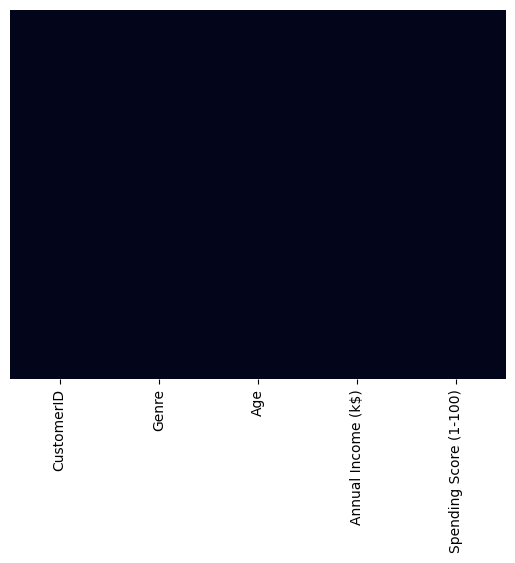

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [7]:
df.rename(columns={
    'Genre': 'Gender',
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

In [11]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [12]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


NOW THE DATA LOOKS GOOD. LET'S START WITH MACHINE LEARNING

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import learning_curve

In [13]:
#scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

WE WILL USE DIFFERENT CLUSTERING MODELS

In [ ]:
#Map different clustering models  
models = {
    'KMeans': KMeans(n_clusters=5, random_state=42),
    'GMM': GaussianMixture(n_components=5, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=5),
    'DBSCAN': DBSCAN(eps=0.6, min_samples=5)
}

c:\Coding\python\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Coding\python\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Coding\python\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Coding\python\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Coding\python\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


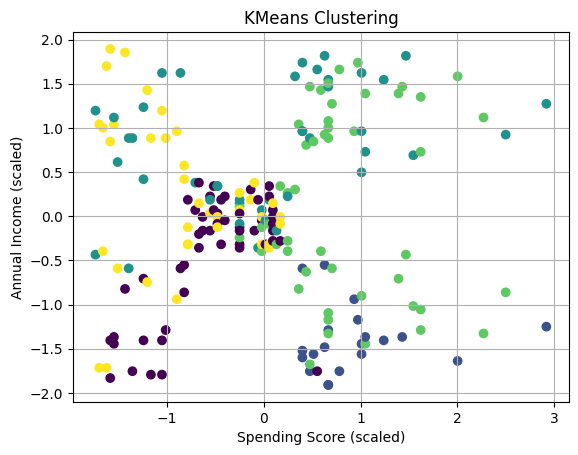

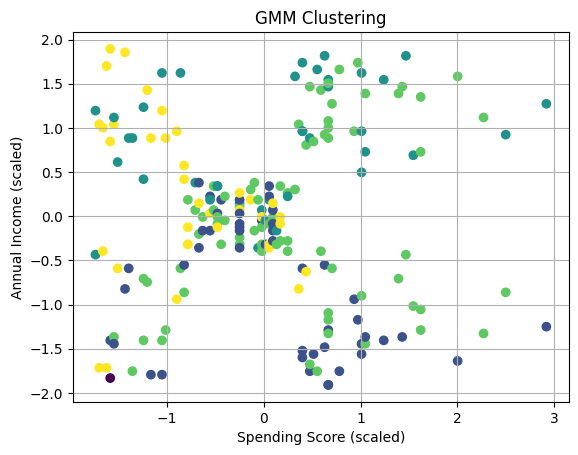

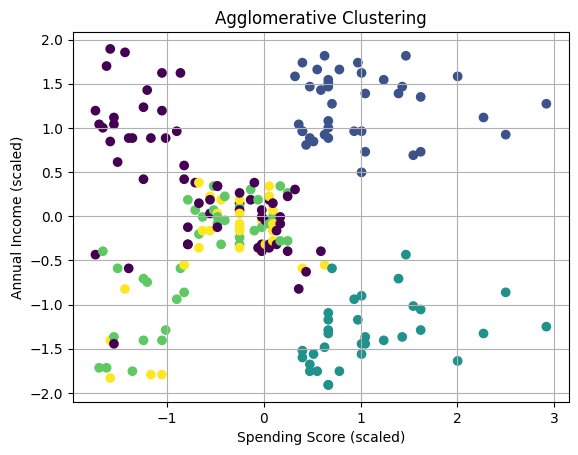

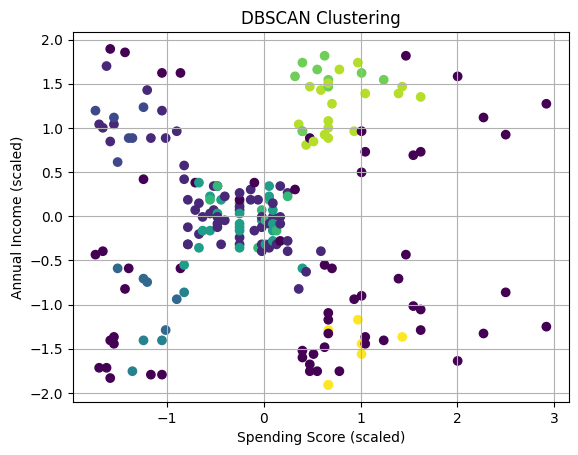

In [15]:
#Now we will train, predict and evaluate the model
results = []
for name, model in models.items():
    if name == 'GMM':
        preds = model.fit_predict(X)
    else:
        preds = model.fit(X).labels_

    score = silhouette_score(X, preds)
    results.append((name, score))

    # Visualize clusters
    plt.figure()
    plt.scatter(X[:, 2], X[:, 3], c=preds, cmap='viridis')
    plt.title(f'{name} Clustering')
    plt.xlabel('Spending Score (scaled)')
    plt.ylabel('Annual Income (scaled)')
    plt.grid(True)
    plt.show()

In [17]:
#now we can compare models 
results_df = pd.DataFrame(results, columns=['Model', 'Silhouette Score'])
print(results_df)

           Model  Silhouette Score
0         KMeans          0.271910
1            GMM          0.221640
2  Agglomerative          0.286994
3         DBSCAN          0.093839


Agglomerative has done higher which is better

c:\Coding\python\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Coding\python\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


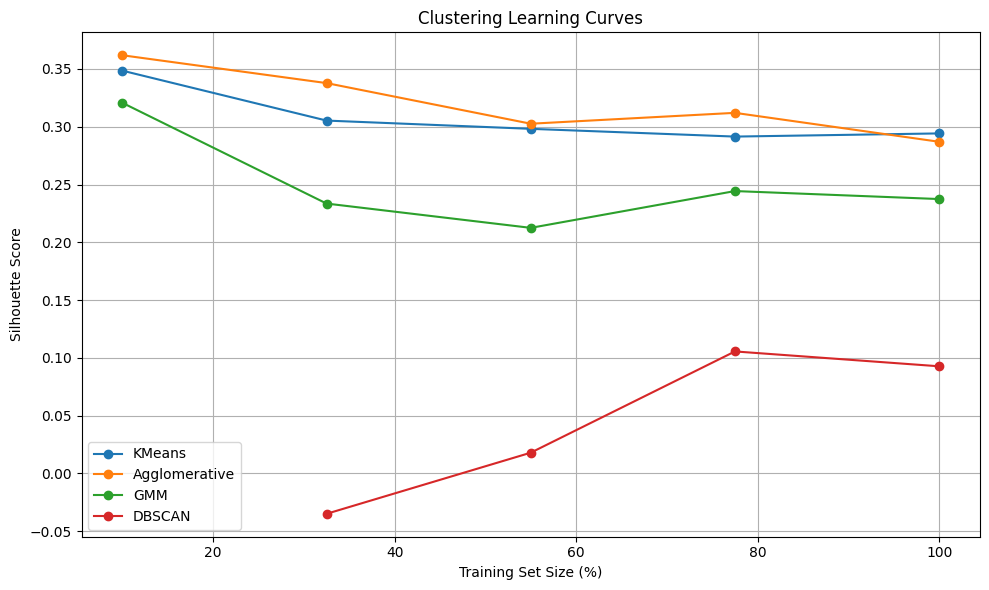

In [25]:
#Let's plot Learning curve 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ShuffleSplit

def plot_clustering_learning_curve(model, X, model_name="Model", splits=5):
    train_sizes = np.linspace(0.1, 1.0, 5)
    scores = []

    for size in train_sizes:
        sample_size = int(size * len(X))
        partial_scores = []

        # Do multiple shuffles to get robust average
        for _ in range(splits):
            idx = np.random.choice(len(X), size=sample_size, replace=False)
            X_sample = X[idx]

            try:
                if hasattr(model, "fit_predict"):
                    labels = model.fit_predict(X_sample)
                else:
                    model.fit(X_sample)
                    labels = model.labels_

                if len(set(labels)) > 1:  # Ignore if all points are one cluster
                    score = silhouette_score(X_sample, labels)
                    partial_scores.append(score)
            except:
                continue

        scores.append(np.mean(partial_scores))

    plt.plot(train_sizes * 100, scores, marker='o', label=model_name)
    plt.xlabel("Training Set Size (%)")
    plt.ylabel("Silhouette Score")
    plt.title("Clustering Learning Curves")
    plt.grid(True)



models = {
    'KMeans': KMeans(n_clusters=5, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=5),
    'GMM': GaussianMixture(n_components=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.6, min_samples=5)
}

plt.figure(figsize=(10, 6))
for name, model in models.items():
    plot_clustering_learning_curve(model, X, model_name=name)

plt.legend()
plt.tight_layout()
plt.show()

IT SEEMS LIKE KMEANS AND AGGLOMERATIVE BOTH PERFORMED EXCELLENT. SO LET'S TUNE THEM AND CHECK IF IT GETS BETTER.

In [ ]:
#use range of k values 
k_range = range(2, 11)
kmeans_scores = []
agglo_scores = []

In [27]:
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_scores.append(silhouette_score(X, kmeans_labels))

    # Agglomerative
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo_labels = agglo.fit_predict(X)
    agglo_scores.append(silhouette_score(X, agglo_labels))



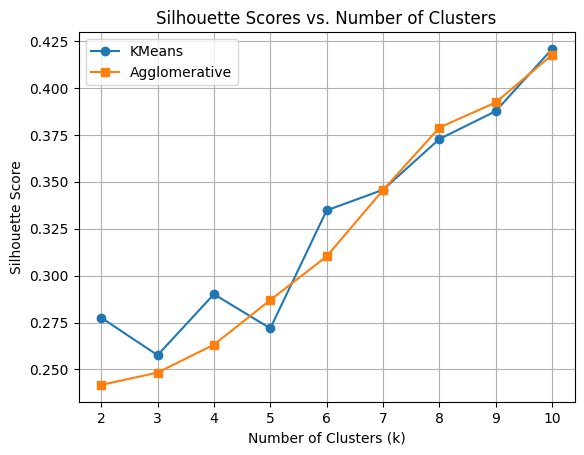

In [28]:
#Now let's check the results
plt.plot(k_range, kmeans_scores, marker='o', label='KMeans')
plt.plot(k_range, agglo_scores, marker='s', label='Agglomerative')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores vs. Number of Clusters")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
best_k_kmeans = k_range[kmeans_scores.index(max(kmeans_scores))]
best_k_agglo = k_range[agglo_scores.index(max(agglo_scores))]

print(f"Best k for KMeans: {best_k_kmeans} with score {max(kmeans_scores):}")
print(f"Best k for Agglomerative: {best_k_agglo} with score {max(agglo_scores):}")

Best k for KMeans: 10 with score 0.42076374869477745
Best k for Agglomerative: 10 with score 0.4176254448686808


Let's train the dataset with 10 as k for both Kmeans and Agg

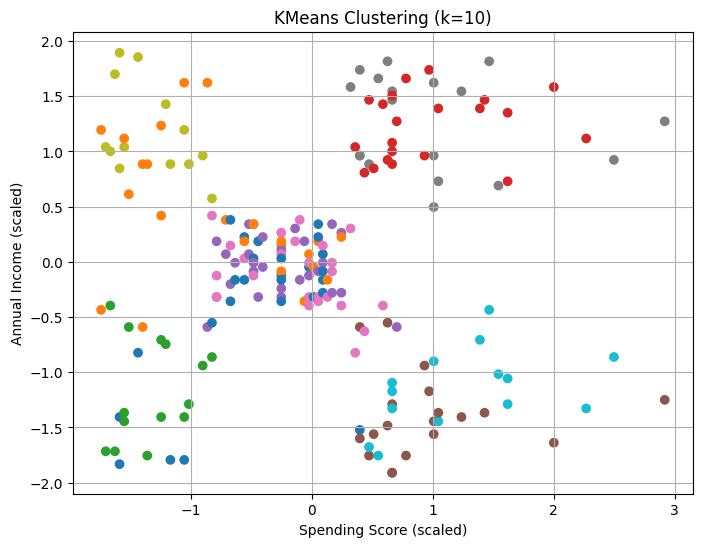

In [30]:
#for kmeans
kmeans_opt = KMeans(n_clusters=10, random_state=42)
labels_kmeans = kmeans_opt.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=labels_kmeans, cmap='tab10')
plt.title("KMeans Clustering (k=10)")
plt.xlabel("Spending Score (scaled)")
plt.ylabel("Annual Income (scaled)")
plt.grid(True)
plt.show()


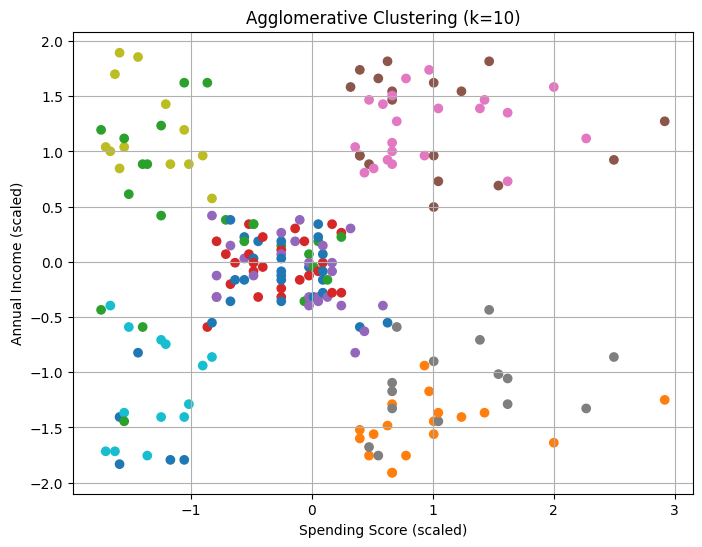

In [31]:
#for agglomerative
agglo_opt = AgglomerativeClustering(n_clusters=10)
labels_agglo = agglo_opt.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=labels_agglo, cmap='tab10')
plt.title("Agglomerative Clustering (k=10)")
plt.xlabel("Spending Score (scaled)")
plt.ylabel("Annual Income (scaled)")
plt.grid(True)
plt.show()

In [ ]:
#Add labels to data
df['Agglo_Cluster'] = labels_agglo

In [33]:
# Compute mean values per cluster
agglo_profile = df.groupby('Agglo_Cluster').mean(numeric_only=True)
agglo_profile = agglo_profile.round(2)


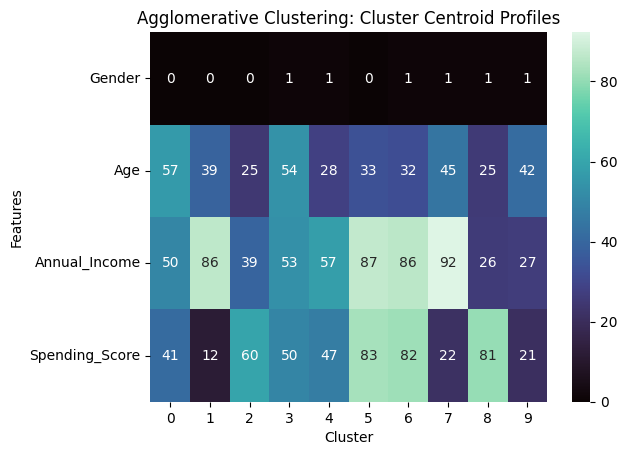

In [34]:
sns.heatmap(agglo_profile.T, annot=True, cmap='mako')
plt.title("Agglomerative Clustering: Cluster Centroid Profiles")
plt.ylabel("Features")
plt.xlabel("Cluster")
plt.show()

WE ARE NOW GIVING LABELS TO THE DATA

In [37]:
def label_cluster(row):
    income = row['Annual_Income']
    spending = row['Spending_Score']

    if income >= 70 and spending >= 60:
        return "High Income, High Spending"
    elif income >= 70 and spending < 40:
        return "High Income, Low Spending"
    elif income < 40 and spending >= 60:
        return "Low Income, High Spending"
    elif income < 40 and spending < 40:
        return "Low Income, Low Spending"
    elif 40 <= income < 70 and spending >= 60:
        return "Mid Income, High Spending"
    elif 40 <= income < 70 and spending < 40:
        return "Mid Income, Low Spending"
    else:
        return "Balanced"


In [39]:
# Apply labeling
agglo_profile['Segment Label'] = agglo_profile.apply(label_cluster, axis=1)

# Display labeled profile
print(agglo_profile[['Annual_Income', 'Spending_Score', 'Segment Label']])

               Annual_Income  Spending_Score               Segment Label
Agglo_Cluster                                                           
0                      50.03           41.34                    Balanced
1                      86.39           11.67   High Income, Low Spending
2                      39.22           59.65                    Balanced
3                      53.24           49.52                    Balanced
4                      57.36           47.12                    Balanced
5                      87.11           82.67  High Income, High Spending
6                      86.05           81.67  High Income, High Spending
7                      92.33           21.60   High Income, Low Spending
8                      25.69           80.54   Low Income, High Spending
9                      26.54           20.69    Low Income, Low Spending


In [41]:
# Create a mapping dictionary
label_map = agglo_profile['Segment Label'].to_dict()

# Apply this mapping to your original df
df['Segment'] = df['Agglo_Cluster'].map(label_map)


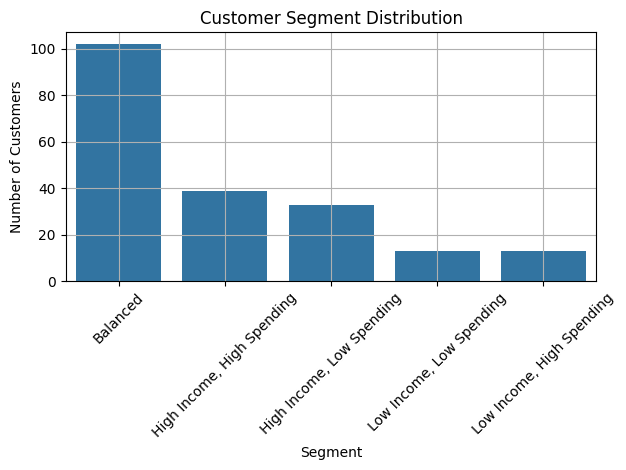

In [47]:
sns.countplot(x='Segment', data=df, order=df['Segment'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Customer Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

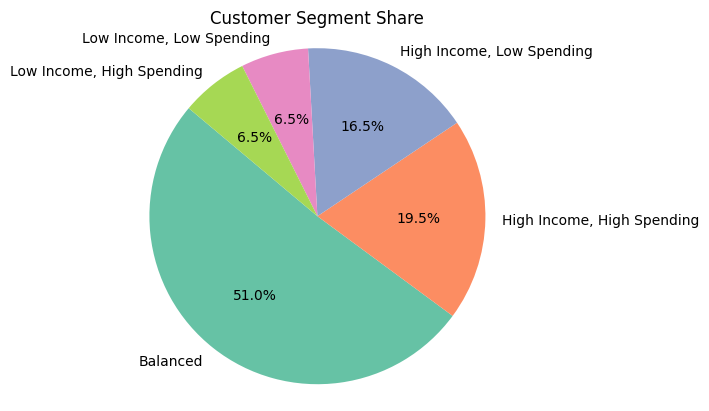

In [48]:
segment_counts = df['Segment'].value_counts()

plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Customer Segment Share")
plt.axis('equal')
plt.show()